# Get dataset

In [ ]:
from google.colab import drive
 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
project_path = '/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R3'
in_dataset_path = '{}/in/'.format(project_path)
%cd '/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R3'

/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R3


In [ ]:
# Check the current path
!pwd

/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R3


# Download dataset

In [ ]:
import os

def create_in_folder(project_path):
  %pwd
  try:
    os.mkdir("in")
  except:
    print("In already exists");

  os.chdir(project_path)

In [ ]:
create_in_folder(project_path)
%cd './in'
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip 
!unzip jena_climate_2009_2016.csv.zip
%cd '../'

In already exists
/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R3/in
--2022-09-06 23:37:07--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.199.144
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.199.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip.3’

jena_climate_2009_2 100%[===================>]  12.94M  34.9MB/s    in 0.4s    

2022-09-06 23:37:08 (34.9 MB/s) - ‘jena_climate_2009_2016.csv.zip.3’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
replace jena_climate_2009_2016.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  
/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R3


In [ ]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R3


# Load dataset to memory

In [ ]:
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
file_name = "jena_climate_2009_2016.csv"
csv_path = "{}{}".format(in_dataset_path, file_name)
df = pd.read_csv(csv_path)

In [ ]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
# Take timestamps of every 30 minutes
df = df[2::3]
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
14,01.01.2009 02:30:00,996.81,-8.66,264.74,-9.46,93.9,3.17,2.98,0.19,1.86,2.99,1311.37,0.33,0.75,155.9


In [ ]:
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

# Data visualization

In [ ]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
8,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
14,996.81,-8.66,264.74,-9.46,93.9,3.17,2.98,0.19,1.86,2.99,1311.37,0.33,0.75,155.9


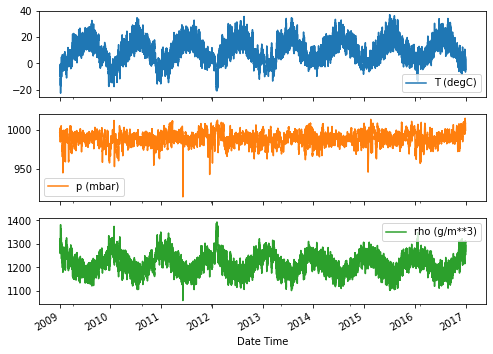

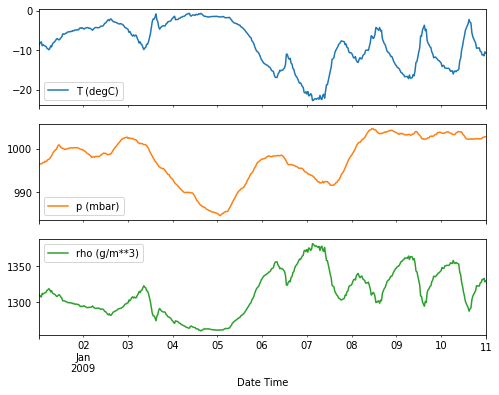

In [ ]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),140150.0,989.212549,8.359709,913.60,984.20,989.57,994.73,1015.30
T (degC),140150.0,9.448860,8.423376,-22.76,3.36,9.41,15.47,37.28
Tpot (K),140150.0,283.491483,8.504513,250.85,277.43,283.46,289.54,311.21
Tdew (degC),140150.0,4.954162,6.730188,-24.80,0.24,5.21,10.07,23.06
rh (%),140150.0,76.006412,16.477056,13.88,65.21,79.30,89.40,100.00
VPmax (mbar),140150.0,13.575196,7.739336,0.97,7.78,11.82,17.60,63.77
VPact (mbar),140150.0,9.532556,4.183739,0.81,6.21,8.86,12.35,28.25
VPdef (mbar),140150.0,4.042580,4.897561,0.00,0.87,2.19,5.30,46.01
sh (g/kg),140150.0,6.021651,2.655854,0.51,3.92,5.59,7.80,18.07
H2OC (mmol/mol),140150.0,9.639017,4.234962,0.81,6.29,8.96,12.48,28.74


In [ ]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [ ]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

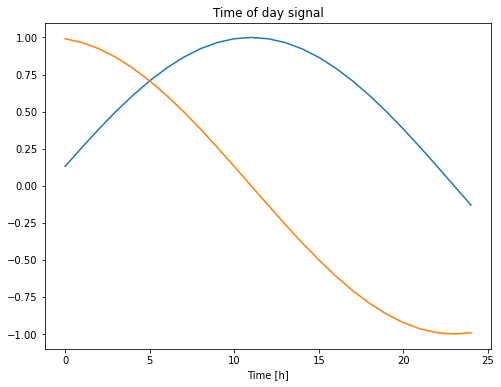

In [ ]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

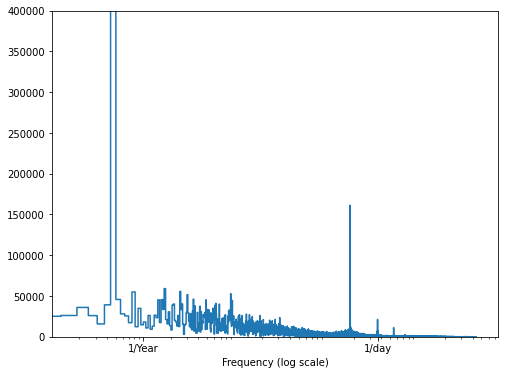

In [ ]:
fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

# Split dataset

In [ ]:
print(len(df))

140150


In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}
train_split = int(200000 / 3)
validation_split = int(100000 / 3)

n = len(df)
val_train_size = train_split + validation_split

train_df = df[:train_split]
val_df = df[train_split:val_train_size]
test_df = df[val_train_size:]

num_features = df.shape[1]

In [ ]:
train_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Day sin,Day cos,Year sin,Year cos
2,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6,0.130526,0.991445,0.009691,0.999953
5,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7,0.258819,0.965926,0.010049,0.999950
8,996.50,-7.91,265.52,-8.73,93.80,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5,0.382683,0.923880,0.010407,0.999946
11,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3,0.500000,0.866025,0.010766,0.999942
14,996.81,-8.66,264.74,-9.46,93.90,3.17,2.98,0.19,1.86,2.99,1311.37,0.33,0.75,155.9,0.608761,0.793353,0.011124,0.999938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199985,989.08,16.84,290.91,10.49,66.15,19.21,12.71,6.50,8.03,12.85,1182.35,1.60,2.70,221.5,-0.939693,0.342020,-0.948763,0.315987
199988,989.13,16.58,290.65,10.67,68.04,18.90,12.86,6.04,8.12,13.00,1183.41,1.53,2.32,195.5,-0.887011,0.461749,-0.948650,0.316327
199991,989.18,15.89,289.95,10.54,70.50,18.08,12.75,5.33,8.06,12.89,1186.34,1.06,2.04,195.4,-0.819152,0.573576,-0.948537,0.316667
199994,989.25,14.94,288.99,10.13,72.90,17.01,12.40,4.61,7.84,12.54,1190.50,1.96,2.80,216.0,-0.737277,0.675590,-0.948423,0.317007


In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

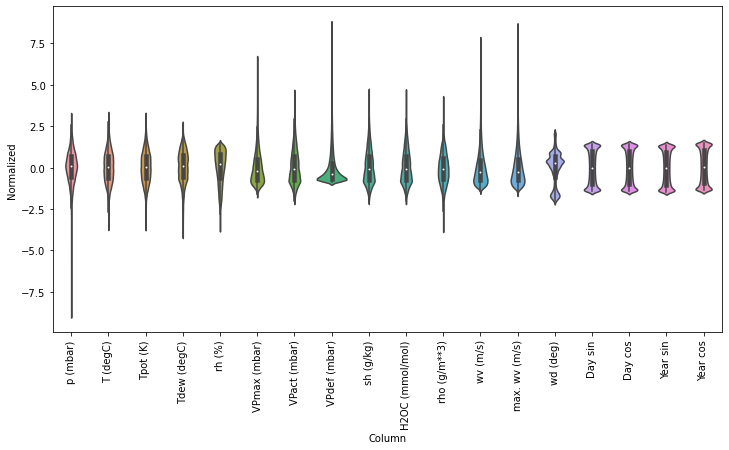

In [ ]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  result = getattr(self, '_example', None)
  if result is None:
    result = next(iter(self.train))
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=5,
    label_columns=['T (degC)'])

wide_window

Total window size: 29
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28]
Label column name(s): ['T (degC)']

# Generate/train model

In [ ]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 18)
Output shape: (32, 24, 1)


In [ ]:
val_performance = {}
performance = {}

In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):

  checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("out/model.h5", monitor='loss', verbose=1, save_best_only=True, mode='min')
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping, checkpoint_callback])
  return history

In [ ]:
history = compile_and_fit(lstm_model, wide_window)
IPython.display.clear_output()

In [ ]:
loss, mae = lstm_model.evaluate(wide_window.test)
loss

1254/1254 [==============================] - 5s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0927


0.016305945813655853

In [ ]:
wide_window.plot(lstm_model)